In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets('data/MNIST/', one_hot=True) #onhot=true -> y=5 ise => on tane eleman olan vektore cevirdi -> y=[0,0,0,0,1,0,0,0,0,0]

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
def show_digit(pixels):
    img = pixels.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='gray_r')

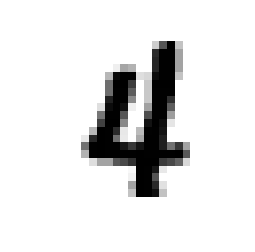

In [4]:
sample = random.choice(mnist.train.images)

show_digit(sample)

In [5]:
print(u"Training data set: %d" % len(mnist.train.images))
print(u"Test data set: %d" % len(mnist.test.images))

Training data set: 55000
Test data set: 10000


In [6]:
#veri setini iclerine koymak icin
X = tf.placeholder(tf.float32, [None, 784]) #yertutucu tersorfow degiskeni, yertutucunun veri tipi float32, matrix formatinda kac satir oldugunu bilmiyoruz o yuzden none, 784 deger
y = tf.placeholder(tf.float32, [None, 10]) #onhot=true -> y=5 ise => on tane eleman olan vektore cevirdi -> y=[0,0,0,0,1,0,0,0,0,0]

W = tf.Variable(tf.truncated_normal(shape=[784, 10], stddev=0.1)) #rastgele sayilar olustur, boyutu 784x4. 0.1 -> elemanlar arasi sicrama
b = tf.Variable(tf.constant(shape=[10], value=0.1)) #basta sabit bir deger=0.1, boyutu 10

In [7]:
y_pred = tf.nn.softmax(tf.matmul(X, W) + b) #y_pred=[0.01, 0.2.., 0.75, ...,0.1] en yuksek 5inci index, y ile karsilastirmasi kolay eger onehot true ise

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred),
                                    reduction_indices=[1])) # probleme gore maliyet fonksiyonlari vardir, bu fonksiyon cross entropy. fonksiyona gore deger ne kadar buyuk ise o kadar kotu
# loss un minimum oldugu noktayi ariyoruz

optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss) # 0.05 -> learning rate 

correct_predictions = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1)) # liste halinde true false cikaracak
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) # dogrular 1.0, yanlislar 0. reduce_mean -> listenin icindeki m tane sayiyi topla ve m ye bol (yani ortalama al)

In [8]:
sess = tf.Session() # calisirabilmek icin session olusturduk
sess.run(tf.global_variables_initializer())

for i in range(10000):
    xs, ys = mnist.train.next_batch(150) # 128 resim. tek seferde tek resim gondermek maliyeti yukseltir o yuzden 128 tane resmi paket halinde gonder. sistem gucune gore sayi artabilir azaltilabilir
    
    sess.run(optimizer, feed_dict={X: xs, y: ys})
    
    if i % 500 == 0: #her 500 adimda accuracy calistir, test veri setinin hepsini gonder, modelin basarisini olc
        acc = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                           y: mnist.test.labels})
        print("[*] Step: %d, test accuracy: %.2f%%" % (i, acc * 100))
        

[*] Step: 0, test accuracy: 6.90%
[*] Step: 500, test accuracy: 88.45%
[*] Step: 1000, test accuracy: 89.79%
[*] Step: 1500, test accuracy: 90.39%
[*] Step: 2000, test accuracy: 90.73%
[*] Step: 2500, test accuracy: 90.99%
[*] Step: 3000, test accuracy: 91.14%
[*] Step: 3500, test accuracy: 91.29%
[*] Step: 4000, test accuracy: 91.29%
[*] Step: 4500, test accuracy: 91.47%
[*] Step: 5000, test accuracy: 91.61%
[*] Step: 5500, test accuracy: 91.63%
[*] Step: 6000, test accuracy: 91.67%
[*] Step: 6500, test accuracy: 91.60%
[*] Step: 7000, test accuracy: 91.79%
[*] Step: 7500, test accuracy: 91.84%
[*] Step: 8000, test accuracy: 91.88%
[*] Step: 8500, test accuracy: 91.77%
[*] Step: 9000, test accuracy: 92.03%
[*] Step: 9500, test accuracy: 91.88%


In [9]:
weig = tf.Print(W,[W])
bia = tf.Print(b,[b])
# print sess.run(weig), sess.run(bia)

Probability of being 0: 0.00%
Probability of being 1: 0.00%
Probability of being 2: 0.00%
Probability of being 3: 0.00%
Probability of being 4: 99.73%
Probability of being 5: 0.00%
Probability of being 6: 0.12%
Probability of being 7: 0.01%
Probability of being 8: 0.01%
Probability of being 9: 0.11%


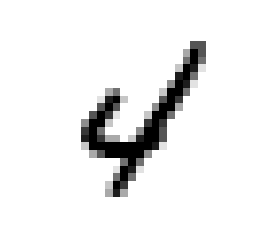

In [18]:
sample = random.choice(mnist.test.images)

predict = sess.run(y_pred, feed_dict={X: [sample]})[0]

for i, v in enumerate(predict):
    print("Probability of being %d: %.2f%%" % (i, v * 100))
    
show_digit(sample)

Probability of being 0: 0.00%
Probability of being 1: 0.00%
Probability of being 2: 31.93%
Probability of being 3: 64.93%
Probability of being 4: 0.00%
Probability of being 5: 3.00%
Probability of being 6: 0.00%
Probability of being 7: 0.00%
Probability of being 8: 0.14%
Probability of being 9: 0.00%


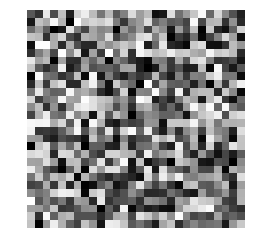

In [21]:
random_img = np.random.rand(784)

predict = sess.run(y_pred, feed_dict={X: [random_img]})[0]

for i, v in enumerate(predict):
    print("Probability of being %d: %.2f%%" % (i, v * 100))
    
show_digit(random_img)